# 2018 ABF SPAN 

In [2]:

%matplotlib inline
%config InlineBackend.figure_format='retina'

import pandas as pd
import seaborn as sns
from tqdm.auto import tqdm

sns.set_style("whitegrid")
import matplotlib.pyplot as plt
import numpy as np
import os
import tempfile

In [3]:
def bedl(file):
    try:
        tf = pd.read_csv(file, sep='\t', header=None)
        return tf[2] - tf[1]
    except:
        return np.zeros(0)  # Empty file


def lines(file):
    try:
        tf = pd.read_csv(file, sep='\t', header=None)
        return len(tf)
    except:
        return 0  # Empty file


def d(a, b):
    return a / b if b != 0 else 0


def last_col(file):
    try:
        cols = len(pd.read_csv(file, sep='\t', nrows=1, header=None).columns)
        return pd.read_csv(file, sep='\t', header=None, usecols=[cols - 1])[cols - 1]
    except:
        return np.zeros(0)  # Empty file


def sorted_file(file):
    ts = tempfile.mktemp()
    ! cat {file} | sort -k1,1 -k2,2n -k3,3n > {ts}
    return ts

In [4]:
def load_peaks(path, suffix, modifications, replicates):
    df = pd.DataFrame(columns=['file', 'modification', 'replicate', 'peaks'],
                      dtype=object)
    for f in tqdm(os.listdir(path)):
        if not f.endswith(suffix):
            continue
        mod = next((m for m in modifications if m.lower() in f.lower()), None)
        rep = next((r for r in replicates if f'{r.lower()}_' in f.lower()), None)
        if mod and rep is not None:
            peaks_path = os.path.join(path, f)
            ps = lines(peaks_path)
            df.loc[len(df)] = (peaks_path, mod, rep, ps)
    return df


# Load peaks

In [5]:
PATH = os.path.expanduser('~/data/2018_chipseq_y20o20')
MODIFICATIONS = ['k4me3', 'k27ac', 'k4me1', 'k27me3', 'k36me3']
REPLICATES = [f'OD{i}' for i in range(1, 30)] + [f'YD{i}' for i in range(1, 30)]

In [5]:
df_macs2broad = load_peaks(os.path.join(PATH, 'macs2'), '.broadPeak', MODIFICATIONS, REPLICATES, )
df_macs2broad['tool'] = 'MACS2'
print('MACS2 broad', len(df_macs2broad))

df_macs2broad_abf = load_peaks(os.path.join(PATH, 'macs2_abf'), '.broadPeak', MODIFICATIONS, REPLICATES, )
df_macs2broad_abf['tool'] = 'MACS2 ABF'
print('MACS2 broad ABF', len(df_macs2broad_abf))

df_sicer = load_peaks(os.path.join(PATH, 'sicer_abf'), '.bed', MODIFICATIONS, REPLICATES, )
df_sicer['tool'] = 'SICER'
print('SICER', len(df_sicer))

df_span_tuned = load_peaks(os.path.join(PATH, 'span_tuned'), '.bed', MODIFICATIONS, REPLICATES, )
df_span_tuned['tool'] = 'SPAN tuned'
print('SPAN tuned', len(df_span_tuned))

df_span = load_peaks(os.path.join(PATH, 'span'), '.peak', MODIFICATIONS, REPLICATES, )
df_span['tool'] = 'SPAN'
print('SPAN', len(df_span))

df_peaks = pd.concat([df_macs2broad_abf, df_sicer, df_span_tuned, df_macs2broad, df_span]).reset_index(drop=True)
df_peaks.sample(3)

  0%|          | 0/764 [00:00<?, ?it/s]

MACS2 broad 191


  0%|          | 0/191 [00:00<?, ?it/s]

MACS2 broad ABF 191


  0%|          | 0/79 [00:00<?, ?it/s]

SICER 79


  0%|          | 0/191 [00:00<?, ?it/s]

SPAN tuned 191


  0%|          | 0/1051 [00:00<?, ?it/s]

SPAN 191


,file,modification,replicate,peaks,tool
577,/home/jetbrains/data/2018_chipseq_y20o20/macs2...,k4me1,OD4,227413,MACS2
522,/home/jetbrains/data/2018_chipseq_y20o20/macs2...,k4me3,OD2,24974,MACS2
93,/home/jetbrains/data/2018_chipseq_y20o20/macs2...,k4me1,YD15,68605,MACS2 ABF


/tmp/ipykernel_1825187/2656131935.py:10: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.swarmplot(data=dfm, x='tool', y='peaks',
/tmp/ipykernel_1825187/2656131935.py:10: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.swarmplot(data=dfm, x='tool', y='peaks',
/tmp/ipykernel_1825187/2656131935.py:10: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.swarmplot(data=dfm, x='tool', y='peaks',
/tmp/ipykernel_1825187/2656131935.py:10: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.swarmplot(data=dfm, x='tool', y='peaks',
/home/jetbrains/miniconda3/envs/pubtrends/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 12.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/tmp/ipykernel_1825187/2656131935.py:10: FutureWarning: Passing `palette` without assigning `hue` is depreca

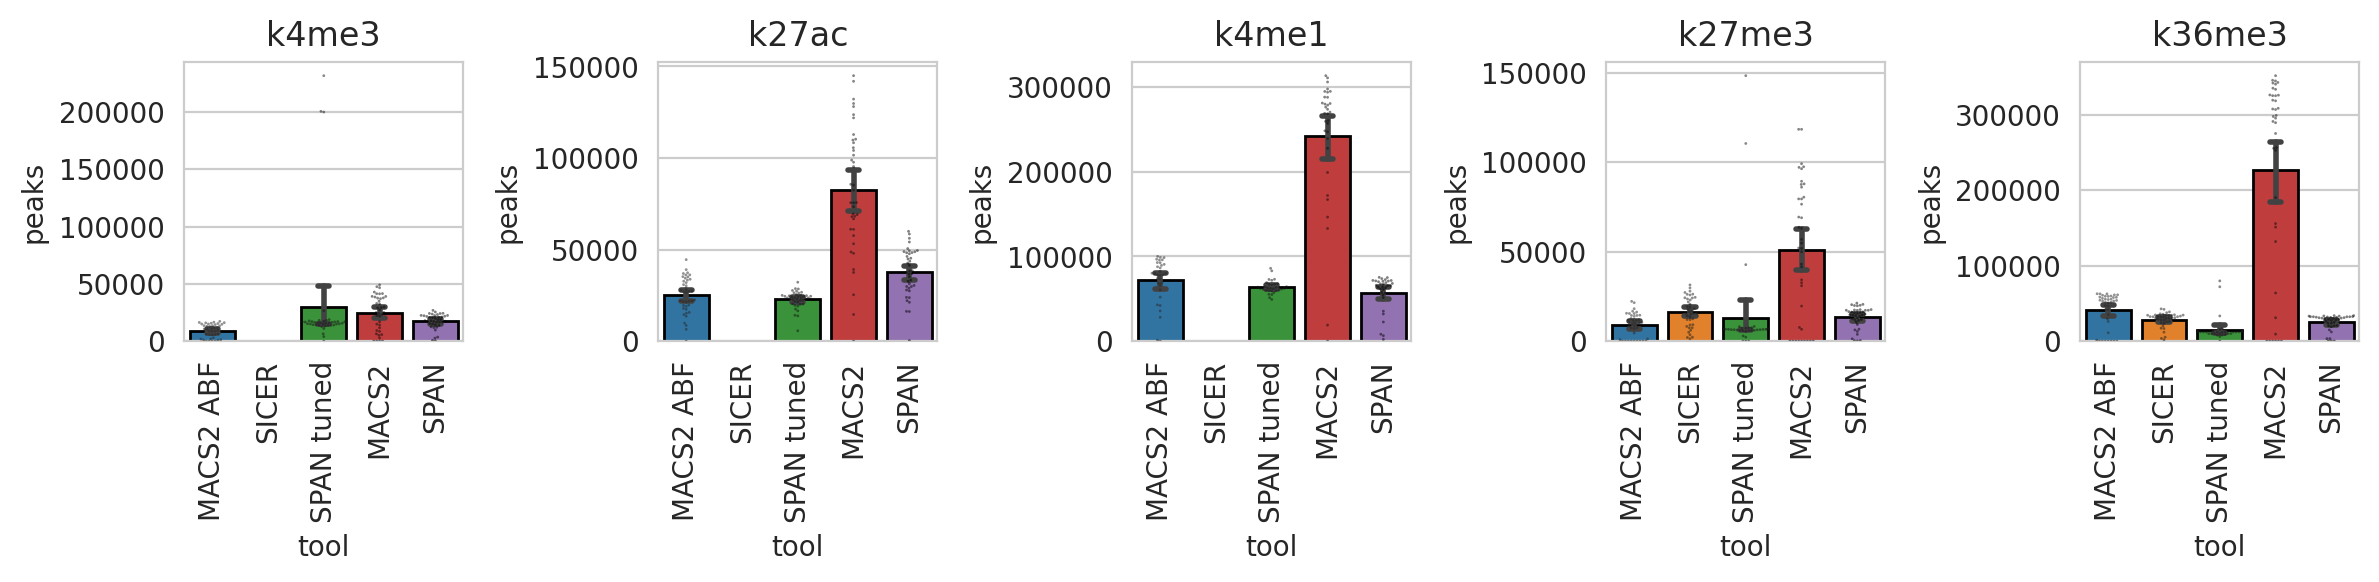

In [7]:
plt.figure(figsize=(12, 3))
axs = [plt.subplot(1, 5, i + 1) for i in range(5)]
for i, m in enumerate(MODIFICATIONS):
    ax = axs[i]
    dfm = df_peaks[df_peaks['modification'] == m]
    sns.barplot(data=dfm, x='tool', y='peaks',
                order=['MACS2 ABF', 'SICER', 'SPAN tuned', 'MACS2', 'SPAN'],
                capsize=.2, errwidth=2, edgecolor="black",
                ax=ax)
    sns.swarmplot(data=dfm, x='tool', y='peaks',
                  order=['MACS2 ABF', 'SICER', 'SPAN tuned', 'MACS2', 'SPAN'],
                  size=1, palette='dark:black', alpha=0.5,
                  ax=ax)
    ax.xaxis.set_tick_params(rotation=90)
    ax.title.set_text(m)
plt.tight_layout()
plt.show()

In [8]:
# Drop outliers
OUTLIERS = {'k27ac': ['YD1', 'YD6'],
           'k27me3': ['OD9', 'YD1', 'YD2', 'YD3', 'YD4', 'YD9', 'YD10', 'YD11'],
           'k36me3': ['OD3', 'OD6', 'OD12', 'OD18', 'OD20', 'YD1', 'YD3', 'YD4', 'YD5'],
           'k4me3': ['OD6', 'OD7', 'OD14', 'YD2', 'YD3', 'YD10', 'YD14']}
t_outliers = [any(f'{o}_h3{m}'.lower() in f.lower() or f'{o}_{m}'.lower() in f.lower() 
                  for m, ol in OUTLIERS.items() for o in ol)
              for f in df_peaks['file']]
print('Total outliers', sum(t_outliers))
df_peaks_no = df_peaks[[not to for to in t_outliers]]

Total outliers 121


In [9]:
df_peaks_no['tool'].unique()

array(['MACS2 ABF', 'SICER', 'SPAN tuned', 'MACS2', 'SPAN'], dtype=object)

In [10]:
# plt.figure(figsize=(1, 2))
# sns.boxplot(data=df_peaks_no, x='tool', y='peaks',
#             # order=['MACS2', 'SICER', 'SPAN tuned', 'SPAN 0.05', 'SPAN 1e-4'],
#             )
# # plt.title('K36me3')
# plt.tight_layout()
# plt.show()

/tmp/ipykernel_1825187/731475380.py:14: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.swarmplot(data=dfm, x='tool', y='peaks',
/tmp/ipykernel_1825187/731475380.py:14: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.swarmplot(data=dfm, x='tool', y='peaks',
/tmp/ipykernel_1825187/731475380.py:14: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.swarmplot(data=dfm, x='tool', y='peaks',
/tmp/ipykernel_1825187/731475380.py:14: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.swarmplot(data=dfm, x='tool', y='peaks',
/home/jetbrains/miniconda3/envs/pubtrends/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 37.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/tmp/ipykernel_1825187/731475380.py:14: FutureWarning: Passing `palette` without assigning `hue` is deprecated.


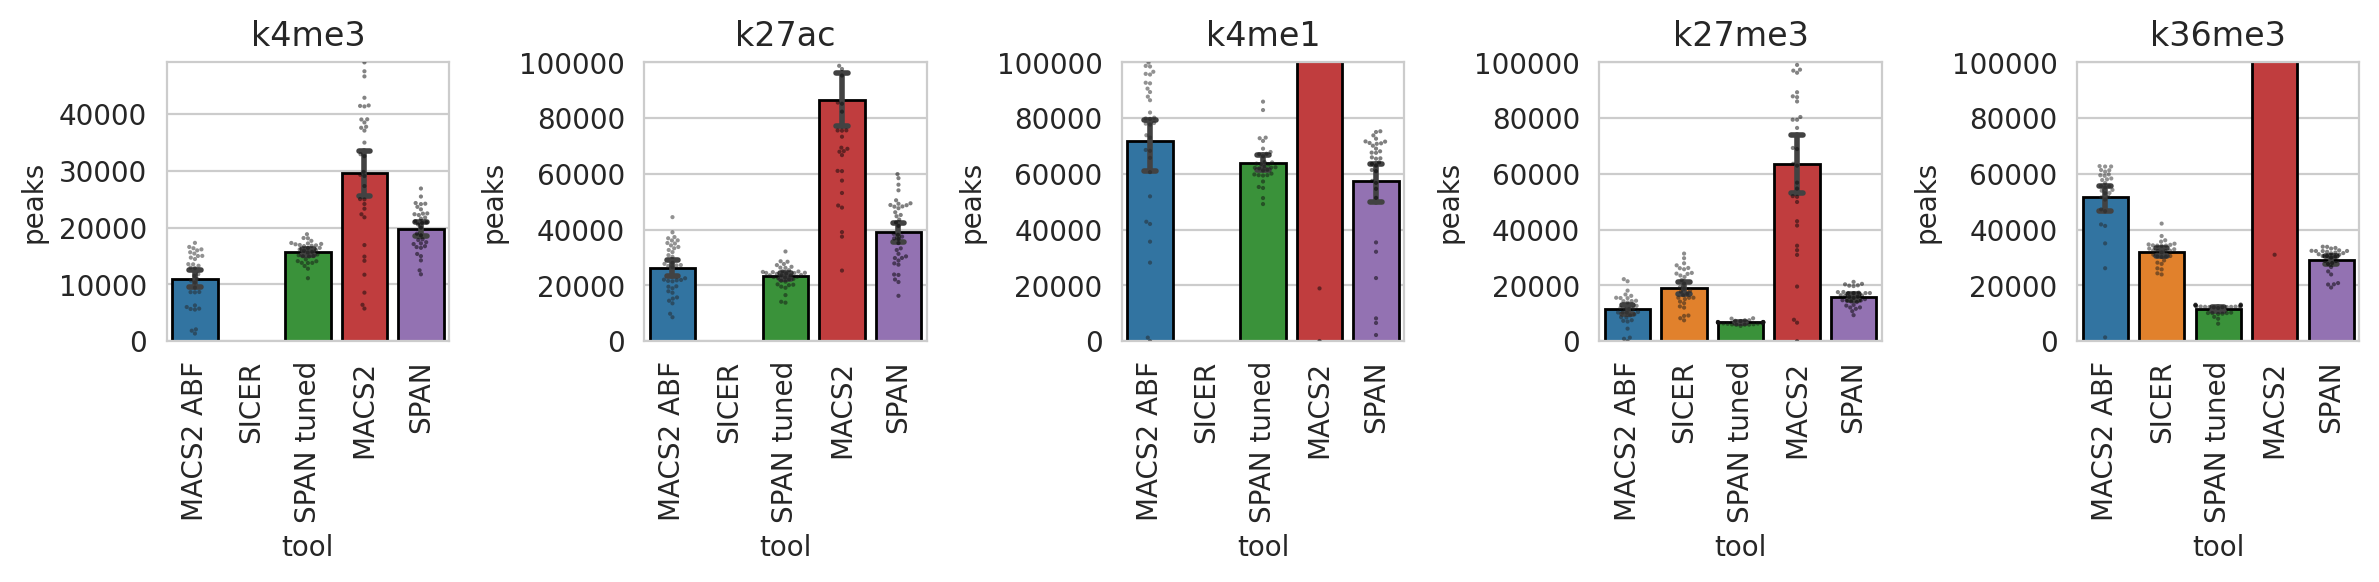

In [11]:
plt.figure(figsize=(12, 3))
axs = [plt.subplot(1, 5, i + 1) for i in range(5)]
for i, m in enumerate(MODIFICATIONS):
    ax = axs[i]
    dfm = df_peaks_no[df_peaks_no['modification'] == m]
    # sns.boxplot(data=dfm, x='tool', y='peaks',
    #             order=['MACS2', 'SICER', 'SPAN tuned', 'SPAN'],
    #             showfliers=True,
    #             ax=ax)
    sns.barplot(data=dfm, x='tool', y='peaks',
                order=['MACS2 ABF', 'SICER', 'SPAN tuned', 'MACS2', 'SPAN'],
                capsize=.2, errwidth=2, edgecolor="black",
                ax=ax)
    sns.swarmplot(data=dfm, x='tool', y='peaks',
                  order=['MACS2 ABF', 'SICER', 'SPAN tuned', 'MACS2', 'SPAN'],
                  size=1.5, palette='dark:black', alpha=0.5,
                  ax=ax)
    ax.xaxis.set_tick_params(rotation=90)
    ax.title.set_text(m)
    ax.set_ylim(0, min(1e5, dfm['peaks'].max()))
plt.tight_layout()
plt.show()

# Lengths

In [12]:
print('Load lengths')
ts = []
for mod, rep, file, tool in tqdm(zip(
        df_peaks_no['modification'], df_peaks_no['replicate'], df_peaks_no['file'],
        df_peaks_no['tool']
)):
    lengths = bedl(file)
    t = pd.DataFrame(dict(length=lengths))
    t = t.sample(min(len(t), 10_000)).copy()
    t['modification'] = mod
    t['replicate'] = rep
    t['tool'] = tool
    t['footprint'] = sum(lengths)
    ts.append(t)
df_lens = pd.concat(ts).reset_index(drop=True)
del ts, t
df_lens.sample(10)

Load lengths


0it [00:00, ?it/s]

,length,modification,replicate,tool,footprint
3594053,400.0,k4me1,YD7,SPAN tuned,138573000
5652897,110.0,k4me1,OD16,SPAN,167394550
4330474,250.0,k4me3,OD8,MACS2,12150718
3194019,600.0,k4me3,OD1,SPAN tuned,29702000
5562014,310.0,k4me3,OD15,SPAN,14285590
3341308,200.0,k27ac,YD16,SPAN tuned,32557800
1916964,2999.0,k27me3,OD16,SICER,78399953
815169,1529.0,k27ac,YD11,MACS2 ABF,34854713
3899067,138.0,k4me1,OD7,MACS2,2565842
5652122,1750.0,k27me3,YD15,SPAN,20821401


k4me3
k27ac
k4me1
k27me3
k36me3


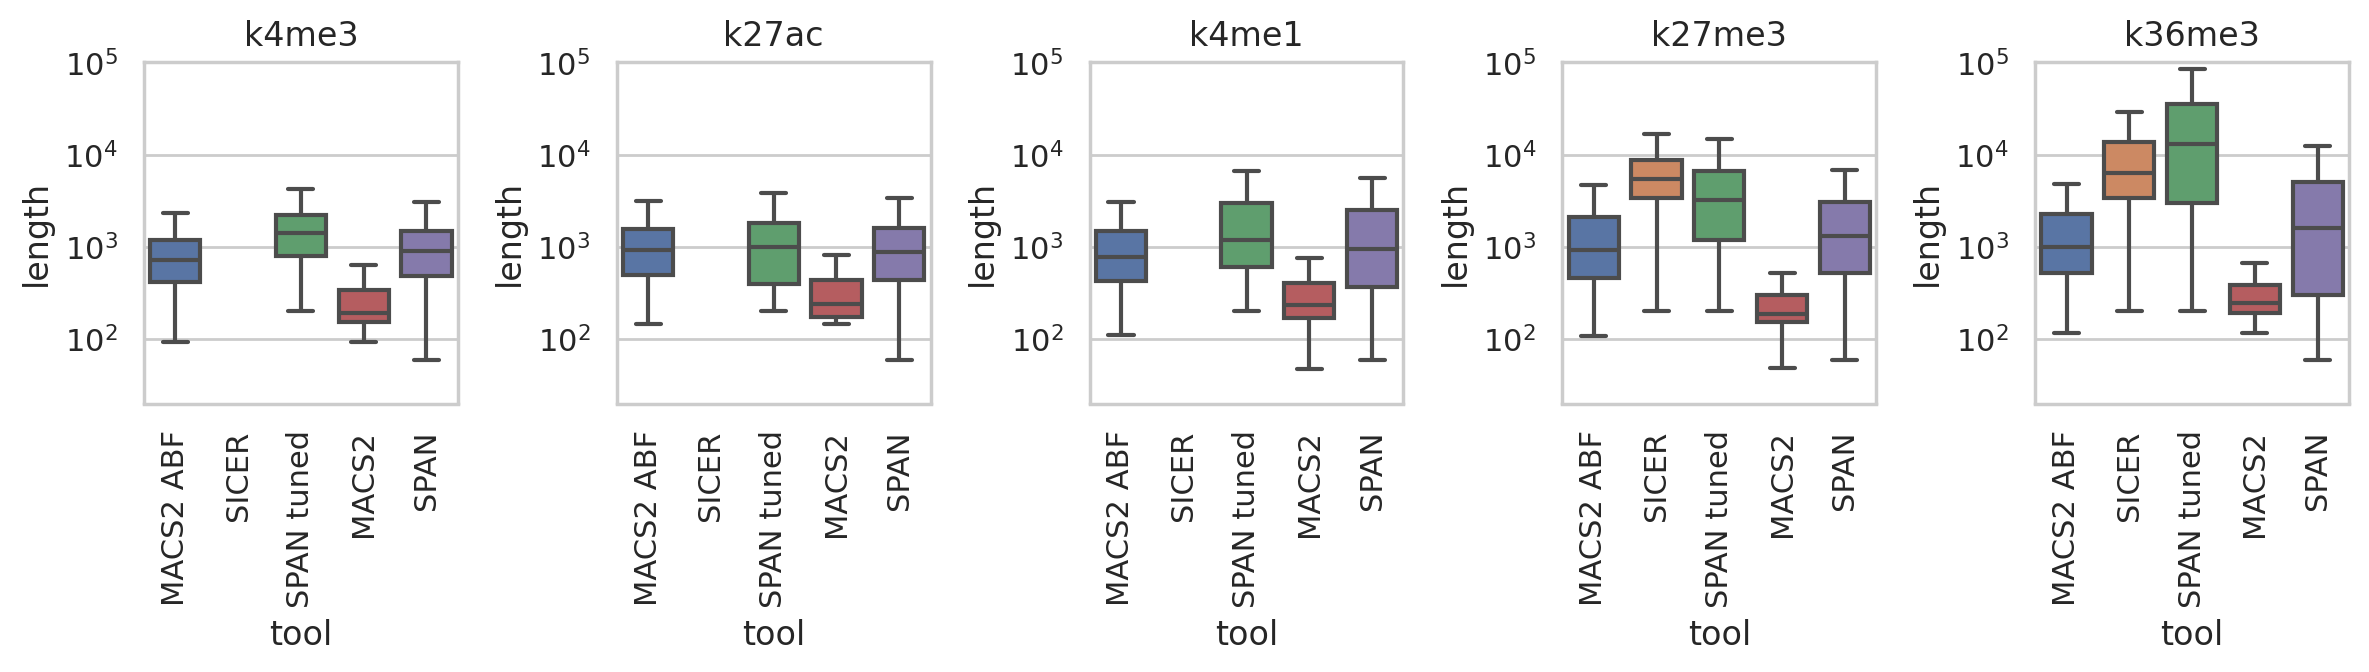

In [13]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(12, 3.5))
axs = [plt.subplot(1, 5, i + 1) for i in range(5)]
for i, m in enumerate(MODIFICATIONS):
    print(m)
    ax = axs[i]
    sns.boxplot(data=df_lens[df_lens['modification'] == m], x='tool', y='length',
                showfliers=False,
                order=['MACS2 ABF', 'SICER', 'SPAN tuned', 'MACS2', 'SPAN'],
                ax=ax)
    ax.title.set_text(m)
    if m not in ['H3K36me3']:
        ax.set_ylim(bottom=20, top=1e5)
    else:
        ax.set_ylim(bottom=20, top=1e5)
    ax.set(yscale='log')
    ax.xaxis.set_tick_params(rotation=90)

plt.tight_layout()
plt.show()

# Jaccard

In [14]:
from itertools import product
import pyranges as pr

def compute_reps_overlap(df_peaks, modifications, fixed=-1):
    reps_overlap = pd.DataFrame(columns=['modification', 'tool', 'rep1', 'rep2',
                                         'peaks1', 'peaks1_len', 'peaks2', 'peaks2_len',
                                         'peaks1_overlap', 'peaks2_overlap', 'peaks_overlap_len'], dtype=object)

    tools = list(sorted(set(df_peaks['tool'])))
    for m in modifications:
        tm = df_peaks[(df_peaks['modification'] == m)]
        reps = list(sorted(set(tm['replicate'])))
        for tool in tools:
            print(m, tool, len(reps))
            files = [None] * len(reps)
            peaks = [-1] * len(reps)
            peaks_lens = [-1] * len(reps)
            # print('Load')
            for i in range(len(reps)):
                t1 = tm[(tm['tool'] == tool) & (tm['replicate'] == reps[i])]
                if len(t1) == 0:
                    continue
                file = t1['file'].values[0]
                peaks[i] = lines(file)
                if peaks[i] == 0:
                    peaks_lens[i] = 0
                    continue
                files[i] = pr.read_bed(sorted_file(file))
                peaks_lens[i] = files[i].lengths().sum()
            # print('Intersect')
            for i, j in tqdm(list(product(range(len(reps)), range(len(reps))))):
                if fixed != -1 and i != fixed or i >= j:
                    continue
                rep1, rep2 = reps[i], reps[j]
                file1, file2 = files[i], files[j]
                peaks1, peaks2 = peaks[i], peaks[j]
                peaks1_len, peaks2_len = peaks_lens[i], peaks_lens[j]
                if peaks1 <= 0 or peaks2 <= 0:
                    reps_overlap.loc[len(reps_overlap)] = \
                        (m, tool, rep1, rep2, peaks1, peaks1_len, peaks2, peaks2_len, 
                         0, 0, 0)
                    continue
                overlap1 = len(file1.overlap(file2))
                overlap2 = len(file2.overlap(file1))
                overlap_len = file1.intersect(file2).lengths().sum()
                # assert file2.intersect(file1).lengths().sum() == overlap_len
                reps_overlap.loc[len(reps_overlap)] = \
                    (m, tool, rep1, rep2, peaks1, peaks1_len, peaks2, peaks2_len,
                        overlap1, overlap2, overlap_len)
    reps_overlap['jaccard'] = [
        d(lo, l1 + l2 - lo)
        for l1, l2, lo in zip(reps_overlap['peaks1_len'], reps_overlap['peaks2_len'], reps_overlap['peaks_overlap_len'])
    ]
    return reps_overlap

In [16]:
df_overlap = compute_reps_overlap(df_peaks_no[df_peaks_no['tool']=='SPAN'], MODIFICATIONS)

k4me3 SPAN 33


  0%|          | 0/1089 [00:00<?, ?it/s]

k27ac SPAN 38


  0%|          | 0/1444 [00:00<?, ?it/s]

k4me1 SPAN 32


  0%|          | 0/1024 [00:00<?, ?it/s]

k27me3 SPAN 32


  0%|          | 0/1024 [00:00<?, ?it/s]

k36me3 SPAN 30


  0%|          | 0/900 [00:00<?, ?it/s]

In [17]:
# df_overlap_full = pd.concat([df_overlap, df_overlap1e_4]).reset_index(drop=True)
df_overlap_full = df_overlap

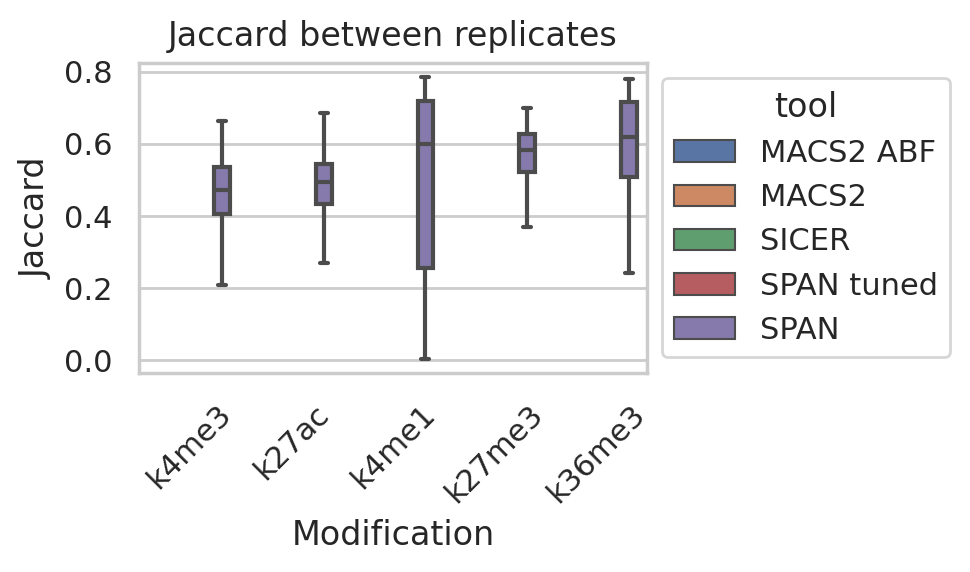

In [18]:
plt.figure(figsize=(5, 3))
ax = plt.axes()
sns.boxplot(data=df_overlap_full, x='modification', hue='tool', y='jaccard',
            hue_order=['MACS2 ABF', 'MACS2', 'SICER', 'SPAN tuned', 'SPAN'],
            showfliers=False,
            ax=ax)
# sns.swarmplot(data=df_overlap_full, x='modification', hue='tool', y='jaccard',
#               dodge=True, size=0.3, palette='dark:black', alpha=0.8,
#               hue_order=['MACS2 ABF', 'MACS2', 'SICER', 'SPAN tuned', 'SPAN'], 
#               legend=False,
#               ax=ax)
ax.set_title('Jaccard between replicates')
ax.set_ylabel('Jaccard')
ax.set_xlabel('Modification')
sns.move_legend(ax, loc='center left', bbox_to_anchor=(1, 0.5))
ax.xaxis.set_tick_params(rotation=45)
plt.tight_layout()
plt.show()

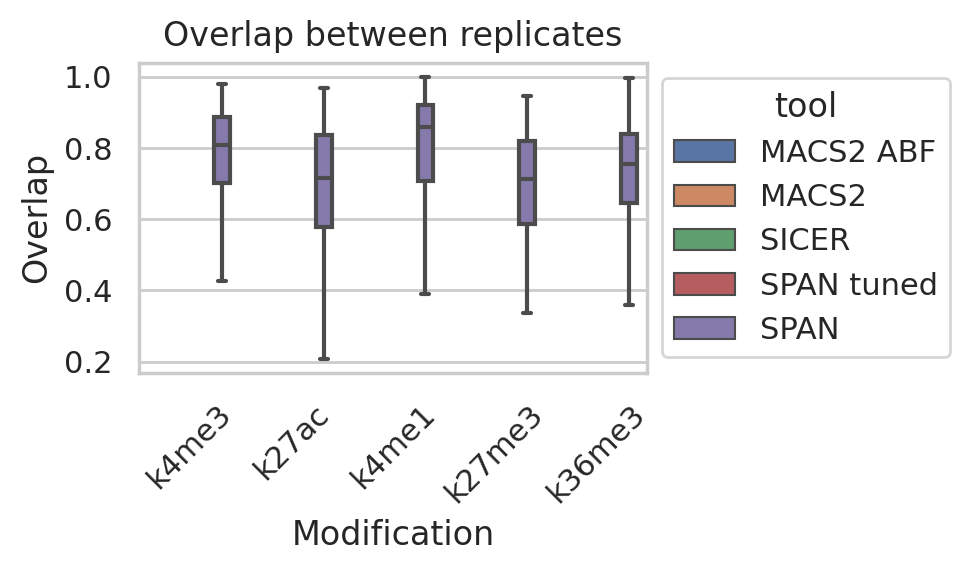

In [19]:
t = pd.concat([df_overlap_full[['modification', 'tool']],
               df_overlap_full[['modification', 'tool']]]).reset_index(drop=True)
overlaps = [d(o, p) for o, p in zip(df_overlap_full['peaks1_overlap'], df_overlap_full['peaks1'])] + \
           [d(o, p) for o, p in zip(df_overlap_full['peaks2_overlap'], df_overlap_full['peaks2'])]
t['overlap'] = overlaps
plt.figure(figsize=(5, 3))
ax = plt.axes()
sns.boxplot(data=t, x='modification', hue='tool', y='overlap',
            hue_order=['MACS2 ABF', 'MACS2', 'SICER', 'SPAN tuned', 'SPAN'],
            showfliers=False
            )
# sns.swarmplot(data=t, x='modification', hue='tool', y='overlap',
#               dodge=True, size=1, palette='dark:black', alpha=0.8,
#               hue_order=['MACS2 ABF', 'MACS2', 'SICER', 'SPAN tuned', 'SPAN'], 
#               legend=False,
#               ax=ax)

ax.set_title('Overlap between replicates')
ax.set_ylabel('Overlap')
ax.set_xlabel('Modification')
sns.move_legend(ax, loc='center left', bbox_to_anchor=(1, 0.5))
ax.xaxis.set_tick_params(rotation=45)
plt.tight_layout()
plt.show()

# Comparison vs ENCODE CD14 data

In [87]:
CD14_ENCODE_PATH = os.path.expanduser('~/data/2024_cd14_monocytes_chipseq')
df_cd14_macs2broad = load_peaks(os.path.join(CD14_ENCODE_PATH, 'macs2'), '.broadPeak', MODIFICATIONS, [''], )
df_cd14_macs2broad['tool'] = 'MACS2'
print('MACS2 broad', len(df_cd14_macs2broad))

df_cd14_span = load_peaks(os.path.join(CD14_ENCODE_PATH, 'span'), '.peak', MODIFICATIONS, [''], )
df_cd14_span['tool'] = 'SPAN'
print('SPAN', len(df_cd14_span))
df_cd14 = pd.concat([df_cd14_macs2broad, df_cd14_span]).reset_index(drop=True)
df_cd14 = df_cd14[(df_cd14['file'].str.contains('GSM1102807')) & (df_cd14['file'].str.contains('hg19'))]
df_cd14

  0%|          | 0/44 [00:00<?, ?it/s]

MACS2 broad 14


  0%|          | 0/44 [00:00<?, ?it/s]

SPAN 14


,file,modification,replicate,peaks,tool
0,/home/jetbrains/data/2024_cd14_monocytes_chips...,k27me3,,63224,MACS2
1,/home/jetbrains/data/2024_cd14_monocytes_chips...,k36me3,,105681,MACS2
3,/home/jetbrains/data/2024_cd14_monocytes_chips...,k4me3,,24027,MACS2
5,/home/jetbrains/data/2024_cd14_monocytes_chips...,k27ac,,45410,MACS2
11,/home/jetbrains/data/2024_cd14_monocytes_chips...,k4me1,,112174,MACS2
14,/home/jetbrains/data/2024_cd14_monocytes_chips...,k4me3,,23718,SPAN
16,/home/jetbrains/data/2024_cd14_monocytes_chips...,k27me3,,28668,SPAN
21,/home/jetbrains/data/2024_cd14_monocytes_chips...,k36me3,,20020,SPAN
23,/home/jetbrains/data/2024_cd14_monocytes_chips...,k27ac,,34670,SPAN
26,/home/jetbrains/data/2024_cd14_monocytes_chips...,k4me1,,112226,SPAN


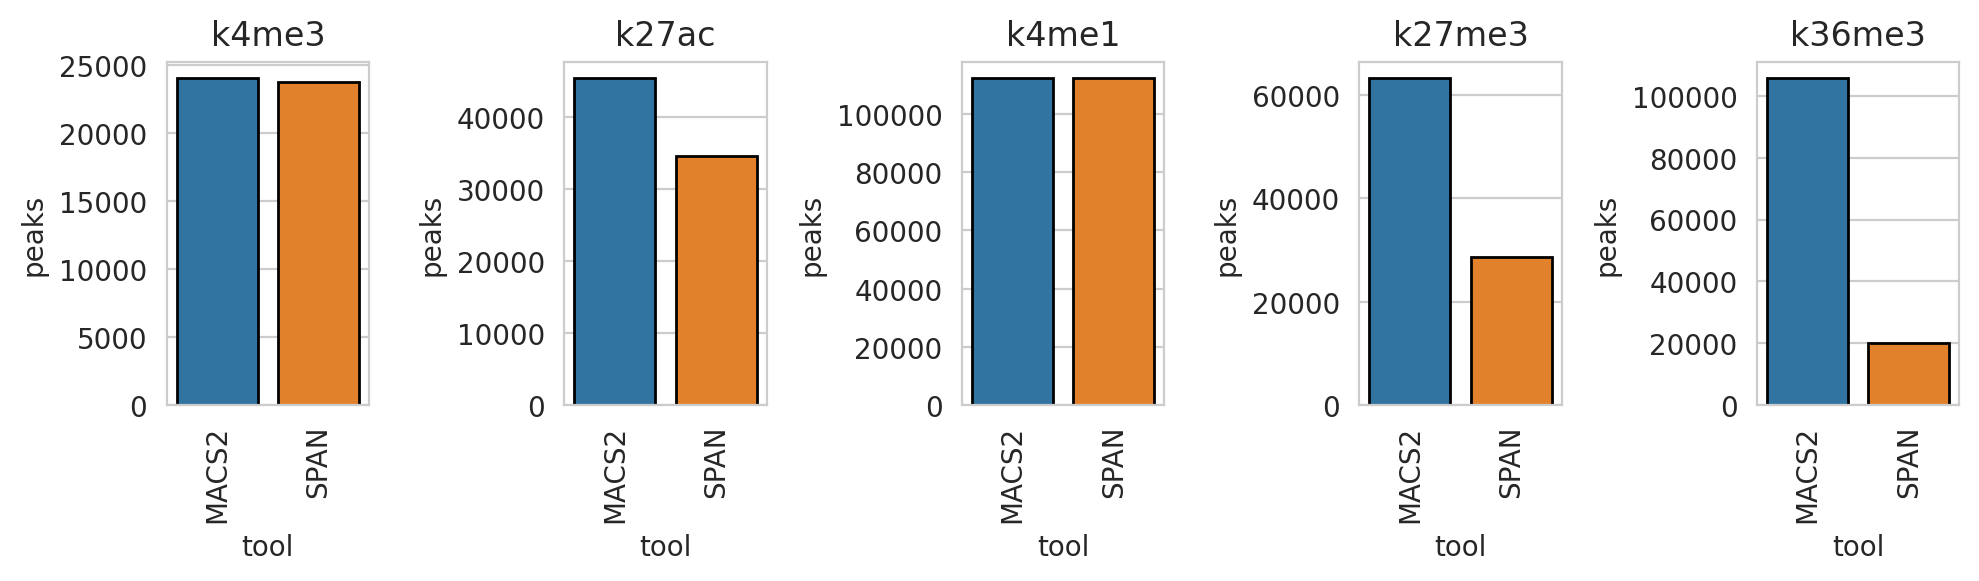

In [90]:
plt.figure(figsize=(10, 3))
axs = [plt.subplot(1, 5, i + 1) for i in range(5)]
for i, m in enumerate(MODIFICATIONS):
    ax = axs[i]
    dfm = df_cd14[df_cd14['modification'] == m]
    sns.barplot(data=dfm, x='tool', y='peaks',
                order=['MACS2', 'SPAN'],
                capsize=.2, errwidth=2, edgecolor="black",
                ax=ax)
    ax.xaxis.set_tick_params(rotation=90)
    ax.title.set_text(m)
plt.tight_layout()
plt.show()

/tmp/ipykernel_51417/4112342384.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_peaks_no['dataset'] = 'Y20O20'


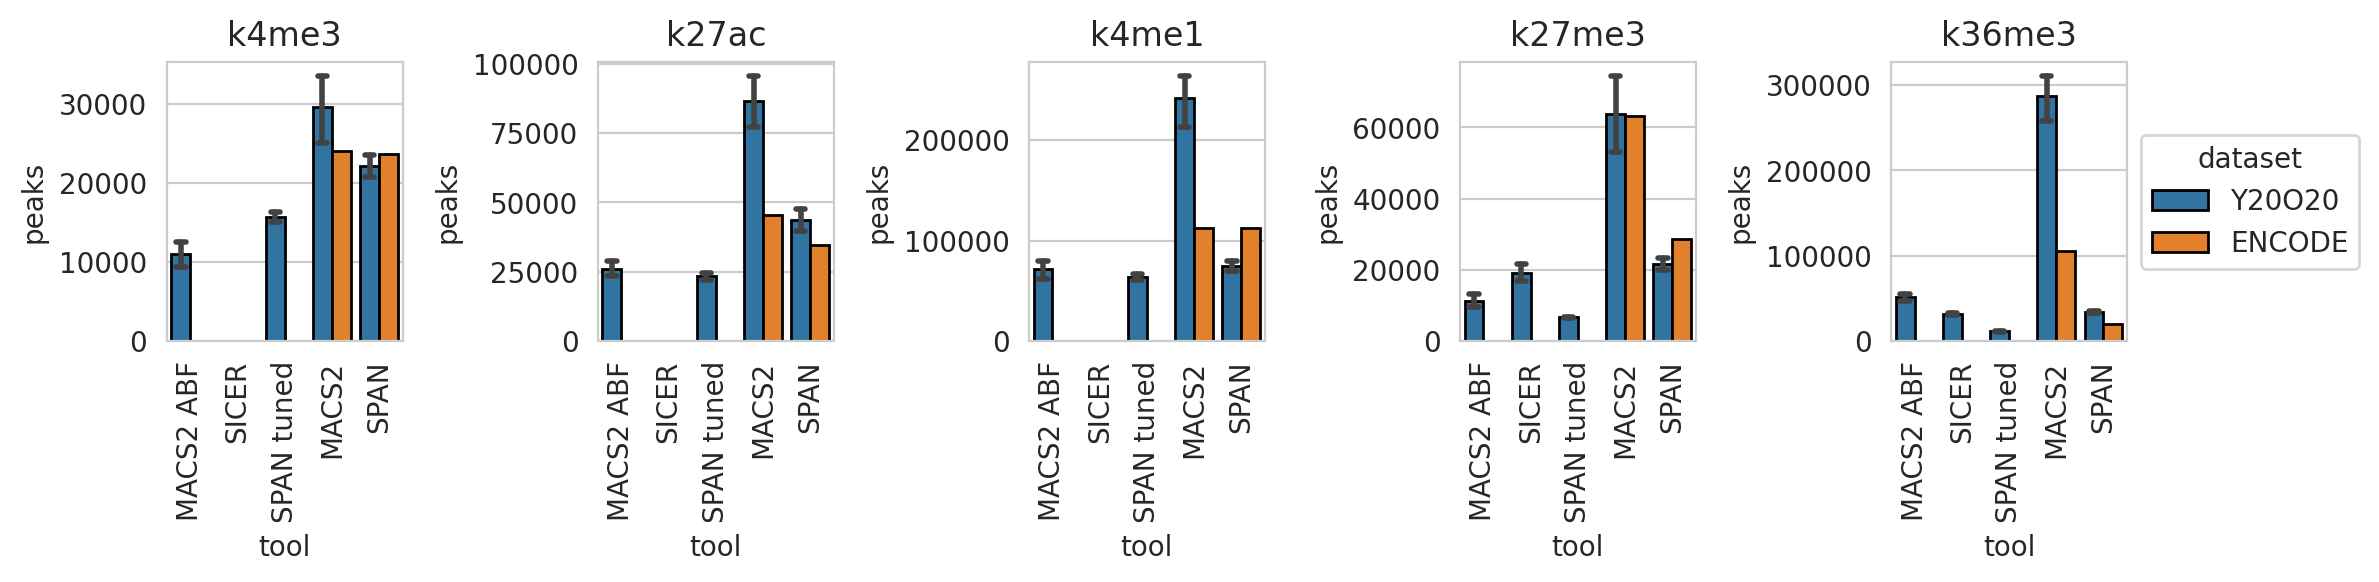

In [105]:
df_peaks_no['dataset'] = 'Y20O20'
df_cd14['dataset'] = 'ENCODE'
t = pd.concat([df_peaks_no, df_cd14]).reset_index(drop=True)

plt.figure(figsize=(12, 3))
axs = [plt.subplot(1, 5, i + 1) for i in range(5)]
for i, m in enumerate(MODIFICATIONS):
    ax = axs[i]
    dfm = t[t['modification'] == m]
    sns.barplot(data=dfm, x='tool', y='peaks', hue='dataset',
                order=['MACS2 ABF', 'SICER', 'SPAN tuned', 'MACS2', 'SPAN'],
                capsize=.2, errwidth=2, edgecolor="black",
                ax=ax)
    ax.xaxis.set_tick_params(rotation=90)
    ax.title.set_text(m)
    # ax.set_ylim(0, min(1.5e5, dfm['peaks'].max()))
    if i == len(axs) - 1:
        sns.move_legend(ax, loc='center left', bbox_to_anchor=(1, 0.5))
    else:
        ax.legend().set_visible(False)
plt.tight_layout()
plt.show()

In [106]:
t = df_cd14.copy()
t['replicate'] = t['tool']
t['tool'] = 'MACS2&SPAN'
df_cd14_overlap = compute_reps_overlap(t, MODIFICATIONS)
df_cd14_overlap

k4me3 MACS2&SPAN 2


  0%|          | 0/4 [00:00<?, ?it/s]

k27ac MACS2&SPAN 2


  0%|          | 0/4 [00:00<?, ?it/s]

k4me1 MACS2&SPAN 2


  0%|          | 0/4 [00:00<?, ?it/s]

k27me3 MACS2&SPAN 2


  0%|          | 0/4 [00:00<?, ?it/s]

k36me3 MACS2&SPAN 2


  0%|          | 0/4 [00:00<?, ?it/s]

,modification,tool,rep1,rep2,peaks1,peaks1_len,peaks2,peaks2_len,peaks1_overlap,peaks2_overlap,peaks_overlap_len,jaccard
0,k4me3,MACS2&SPAN,MACS2,SPAN,24027,27620475,23718,20905299,22688,20063,18487120,0.615444
1,k27ac,MACS2&SPAN,MACS2,SPAN,45410,46661141,34670,47346902,39239,29249,34217851,0.572299
2,k4me1,MACS2&SPAN,MACS2,SPAN,112174,133458767,112226,125902600,107850,90036,110281153,0.739744
3,k27me3,MACS2&SPAN,MACS2,SPAN,63224,73199062,28668,105578939,53125,22299,66122867,0.586949
4,k36me3,MACS2&SPAN,MACS2,SPAN,105681,198917590,20020,264750913,94825,18171,190390887,0.696694


ENCODE


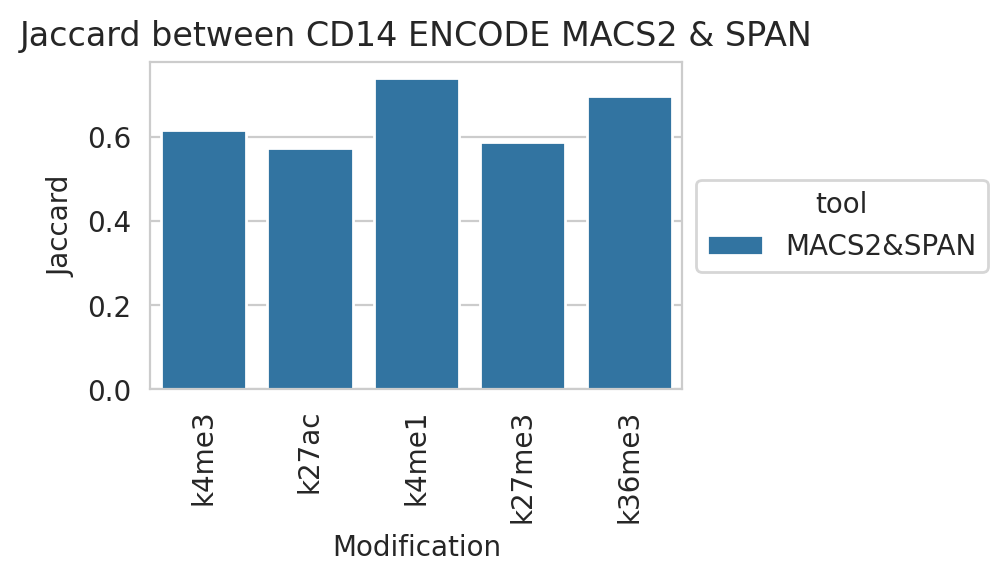

In [92]:
print('ENCODE')
plt.figure(figsize=(5, 3))
ax = plt.axes()
sns.barplot(data=df_cd14_overlap, x='modification', hue='tool', y='jaccard',
            ax=ax)
ax.set_title('Jaccard between CD14 ENCODE MACS2 & SPAN')
ax.set_ylabel('Jaccard')
ax.set_xlabel('Modification')
sns.move_legend(ax, loc='center left', bbox_to_anchor=(1, 0.5))
ax.xaxis.set_tick_params(rotation=90)
plt.tight_layout()
plt.show()

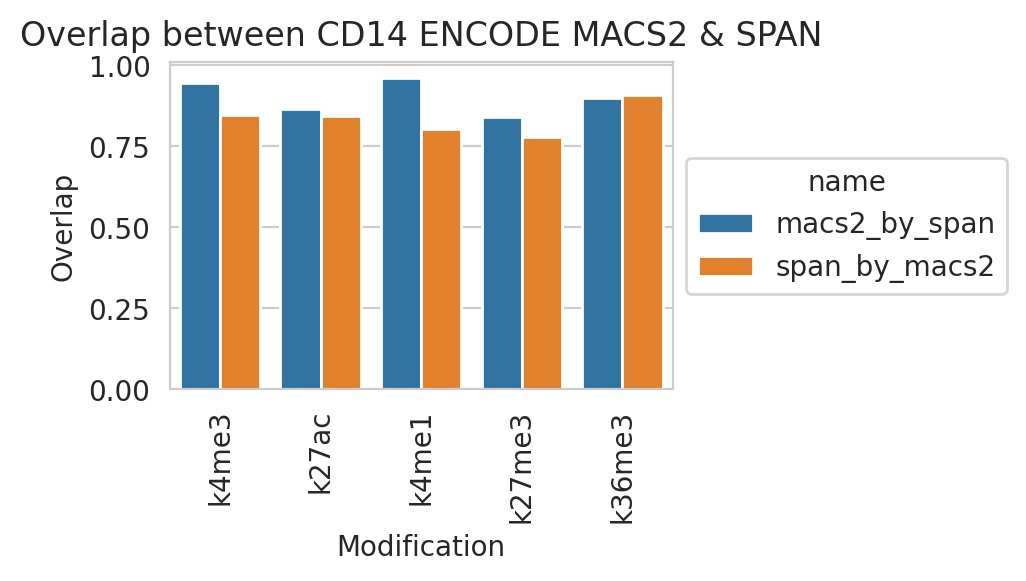

In [93]:
rows = []
for _, row in df_cd14_overlap.iterrows():
    rows.append((row['modification'], 'macs2_by_span', d(row['peaks1_overlap'], row['peaks1'])))
    rows.append((row['modification'], 'span_by_macs2', d(row['peaks2_overlap'], row['peaks2'])))
t = pd.DataFrame(rows, columns=['modification', 'name', 'overlap'])
del rows
plt.figure(figsize=(5, 3))
ax = plt.axes()
sns.barplot(data=t, x='modification', hue='name', y='overlap',
            ax=ax)
ax.set_title('Overlap between CD14 ENCODE MACS2 & SPAN')
ax.set_ylabel('Overlap')
ax.set_xlabel('Modification')
sns.move_legend(ax, loc='center left', bbox_to_anchor=(1, 0.5))
ax.xaxis.set_tick_params(rotation=90)
plt.tight_layout()
plt.show()

In [94]:
ts = []
for (m, tool), dfmt in df_peaks_no.groupby(['modification', 'tool']):
    if tool in ['MACS2', 'MACS2 ABF']:
        encode_tool = 'MACS2'
    elif tool in ['SPAN', 'SPAN tuned']:
        encode_tool = 'SPAN'
    else:
        continue
    t = df_cd14[(df_cd14['modification'] == m) & (df_cd14['tool'] == encode_tool)].copy().reset_index(drop=True)
    t['replicate'] = 'ENCODE'
    t['tool'] = tool
    ts.append(t)
    ts.append(dfmt.copy().reset_index(drop=True))
df_joint = pd.concat(ts).reset_index(drop=True)
df_joint.head(3)

,file,modification,replicate,peaks,tool
0,/home/jetbrains/data/2024_cd14_monocytes_chips...,k27ac,ENCODE,45410,MACS2
1,/home/jetbrains/data/2018_chipseq_y20o20/macs2...,k27ac,OD6,75589,MACS2
2,/home/jetbrains/data/2018_chipseq_y20o20/macs2...,k27ac,YD17,82332,MACS2


In [95]:
df_joint_overlap = compute_reps_overlap(df_joint, MODIFICATIONS, 0)
df_joint_overlap.sample(3)

k4me3 MACS2 34


  0%|          | 0/1156 [00:00<?, ?it/s]

k4me3 MACS2 ABF 34


  0%|          | 0/1156 [00:00<?, ?it/s]

k4me3 SPAN 34


  0%|          | 0/1156 [00:00<?, ?it/s]

k4me3 SPAN tuned 34


  0%|          | 0/1156 [00:00<?, ?it/s]

k27ac MACS2 39


  0%|          | 0/1521 [00:00<?, ?it/s]

k27ac MACS2 ABF 39


  0%|          | 0/1521 [00:00<?, ?it/s]

k27ac SPAN 39


  0%|          | 0/1521 [00:00<?, ?it/s]

k27ac SPAN tuned 39


  0%|          | 0/1521 [00:00<?, ?it/s]

k4me1 MACS2 33


  0%|          | 0/1089 [00:00<?, ?it/s]

k4me1 MACS2 ABF 33


  0%|          | 0/1089 [00:00<?, ?it/s]

k4me1 SPAN 33


  0%|          | 0/1089 [00:00<?, ?it/s]

k4me1 SPAN tuned 33


  0%|          | 0/1089 [00:00<?, ?it/s]

k27me3 MACS2 33


  0%|          | 0/1089 [00:00<?, ?it/s]

k27me3 MACS2 ABF 33


  0%|          | 0/1089 [00:00<?, ?it/s]

k27me3 SPAN 33


  0%|          | 0/1089 [00:00<?, ?it/s]

k27me3 SPAN tuned 33


  0%|          | 0/1089 [00:00<?, ?it/s]

k36me3 MACS2 31


  0%|          | 0/961 [00:00<?, ?it/s]

k36me3 MACS2 ABF 31


  0%|          | 0/961 [00:00<?, ?it/s]

k36me3 SPAN 31


  0%|          | 0/961 [00:00<?, ?it/s]

k36me3 SPAN tuned 31


  0%|          | 0/961 [00:00<?, ?it/s]

,modification,tool,rep1,rep2,peaks1,peaks1_len,peaks2,peaks2_len,peaks1_overlap,peaks2_overlap,peaks_overlap_len,jaccard
558,k36me3,MACS2,ENCODE,YD14,105681,198917590,341774,153354180,82944,270262,129163444,0.578927
178,k27ac,MACS2 ABF,ENCODE,OD17,45410,46661141,17910,19471045,18479,17120,17702407,0.365527
380,k4me1,SPAN tuned,ENCODE,OD10,112226,125902600,69065,185892000,93167,61922,113677005,0.573786


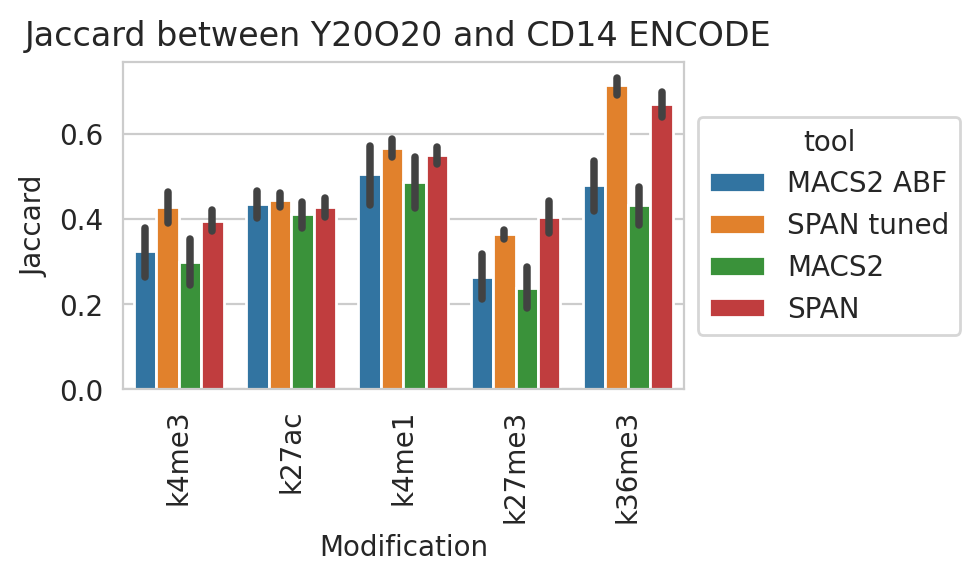

In [96]:
plt.figure(figsize=(5, 3))
ax = plt.axes()
sns.barplot(data=df_joint_overlap, x='modification', y='jaccard', hue='tool',
            hue_order=['MACS2 ABF', 'SPAN tuned', 'MACS2', 'SPAN'],
            ax=ax)
ax.set_title('Jaccard between Y20O20 and CD14 ENCODE ')
ax.set_ylabel('Jaccard')
ax.set_xlabel('Modification')
sns.move_legend(ax, loc='center left', bbox_to_anchor=(1, 0.5))
ax.xaxis.set_tick_params(rotation=90)
plt.tight_layout()
plt.show()

In [97]:
df_joint_overlap['precision'] = [d(po, p) for po, p in zip(df_joint_overlap['peaks1_overlap'], df_joint_overlap['peaks1'])]
df_joint_overlap['recall'] = [d(po, p) for po, p in zip(df_joint_overlap['peaks2_overlap'], df_joint_overlap['peaks2'])]
df_joint_overlap['f1'] = [2 / (1 / p + 1 / r) if min(p, r) > 0 else 0 for p, r in zip(df_joint_overlap['precision'], df_joint_overlap['recall'])]

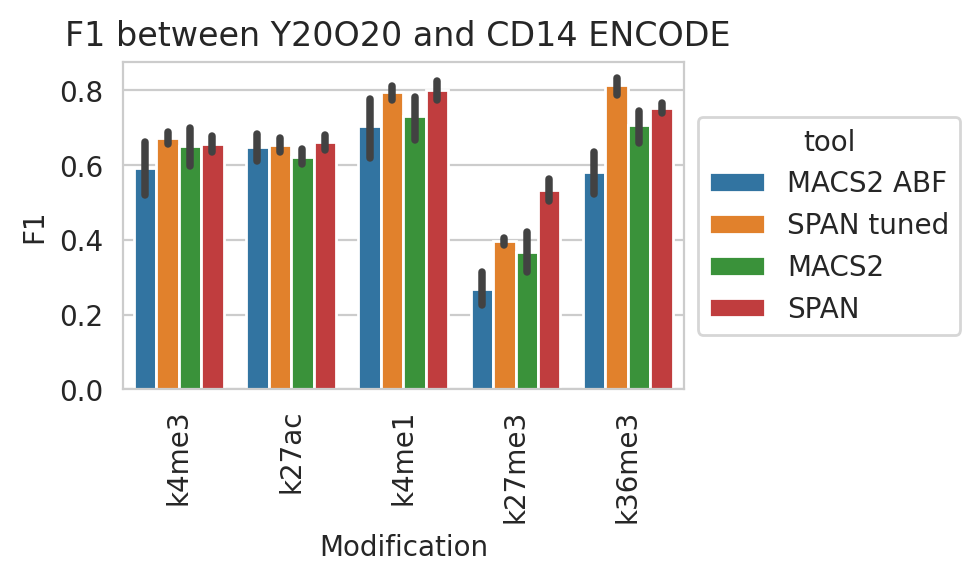

In [98]:
plt.figure(figsize=(5, 3))
ax = plt.axes()
sns.barplot(data=df_joint_overlap, x='modification', y='f1', hue='tool',
            hue_order=['MACS2 ABF', 'SPAN tuned', 'MACS2', 'SPAN'],
            ax=ax)
ax.set_title('F1 between Y20O20 and CD14 ENCODE ')
ax.set_ylabel('F1')
ax.set_xlabel('Modification')
sns.move_legend(ax, loc='center left', bbox_to_anchor=(1, 0.5))
ax.xaxis.set_tick_params(rotation=90)
plt.tight_layout()
plt.show()

In [99]:
# Join
rows = []
for _, row in df_joint_overlap.iterrows():
    rows.append((row['modification'], row['tool'], 'ENCODE_by_Y20O20', d(row['peaks1_overlap'], row['peaks1'])))
    rows.append((row['modification'], row['tool'], 'Y20O20_by_ENCODE', d(row['peaks2_overlap'], row['peaks2'])))
overlap_df = pd.DataFrame(rows, columns=['modification', 'tool', 'name', 'overlap'])
del rows
overlap_df.sample(3)

,modification,tool,name,overlap
505,k27ac,SPAN tuned,Y20O20_by_ENCODE,0.879907
673,k4me1,MACS2 ABF,Y20O20_by_ENCODE,0.000000
1207,k36me3,SPAN,Y20O20_by_ENCODE,0.972428


MACS2 ABF
SPAN tuned
MACS2
SPAN


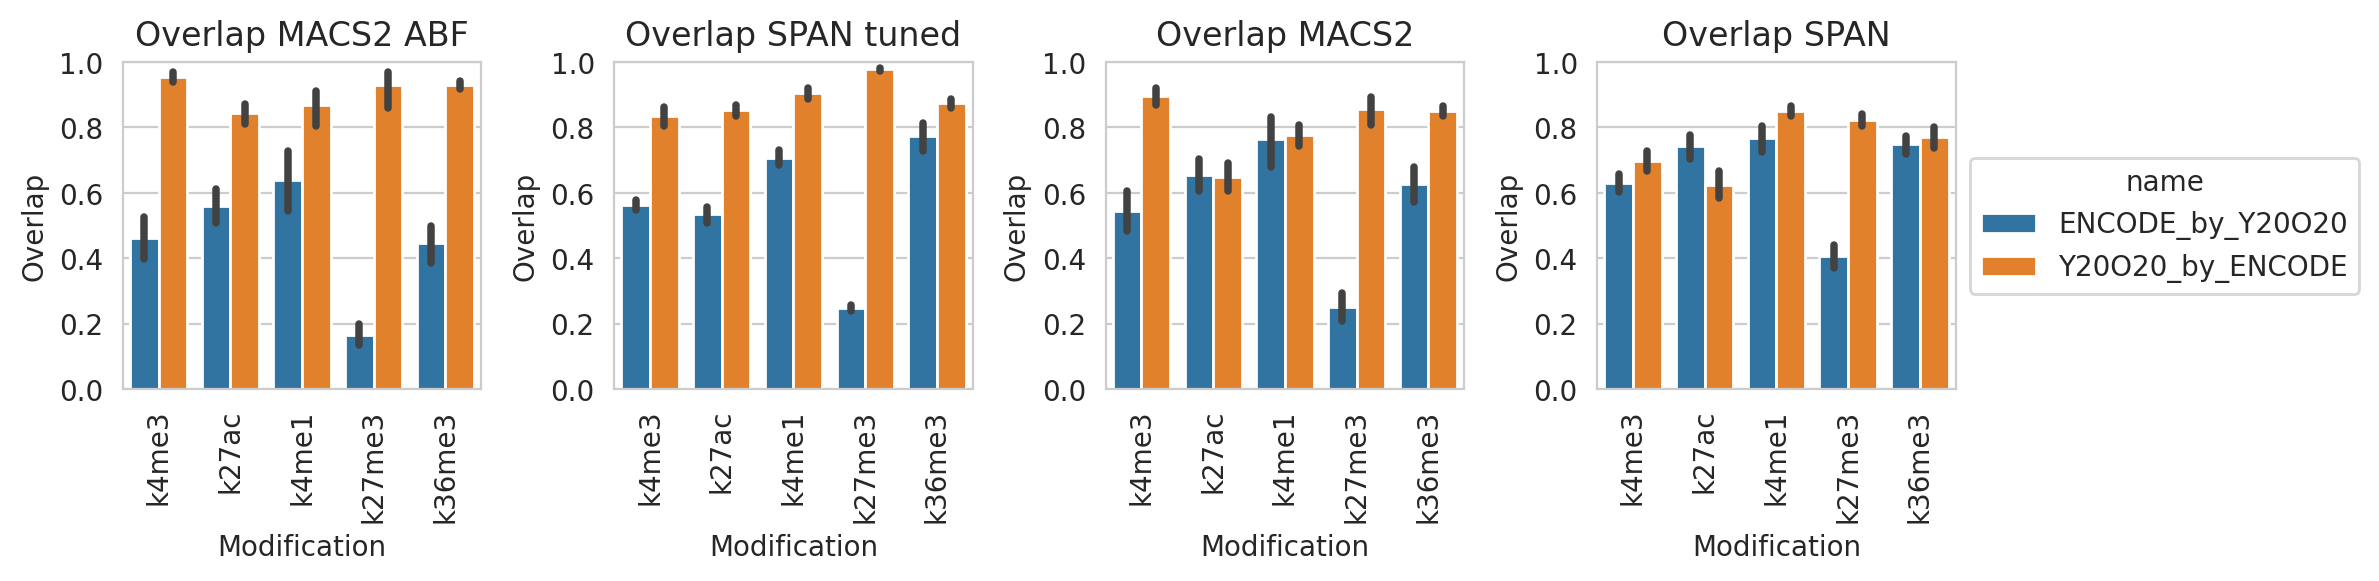

In [100]:
plt.figure(figsize=(12, 3))
axs = [plt.subplot(1, 4, i + 1) for i in range(4)]
for i, tool in enumerate(['MACS2 ABF', 'SPAN tuned', 'MACS2', 'SPAN']):
    print(tool)
    ax = axs[i]
    sns.barplot(data=overlap_df[overlap_df['tool'] == tool], x='modification', hue='name', y='overlap',
                ax=ax)
    ax.set_title(f'Overlap {tool}')
    ax.set_ylabel('Overlap')
    ax.set_xlabel('Modification')
    ax.set_ylim(0, 1)
    if i == len(axs) - 1:
        sns.move_legend(ax, loc='center left', bbox_to_anchor=(1, 0.5))
    else:
        ax.legend().set_visible(False)
    ax.xaxis.set_tick_params(rotation=90)
plt.tight_layout()
plt.show()

# Consensus peaks vs ChromHMM markup

In [7]:
CONSENSUS_PEAKS = {
    m: f'{PATH}/{m}_consensus_union25%.bed' for m in MODIFICATIONS
}
for m in MODIFICATIONS:
    ! wc -l {CONSENSUS_PEAKS[m]}
    pass

16583 /home/jetbrains/data/2018_chipseq_y20o20/k4me3_consensus_union25%.bed
27713 /home/jetbrains/data/2018_chipseq_y20o20/k27ac_consensus_union25%.bed
62050 /home/jetbrains/data/2018_chipseq_y20o20/k4me1_consensus_union25%.bed
9316 /home/jetbrains/data/2018_chipseq_y20o20/k27me3_consensus_union25%.bed
19186 /home/jetbrains/data/2018_chipseq_y20o20/k36me3_consensus_union25%.bed


In [27]:
print('Split chromHMM into separate files')
# CHROMHMM_FILE = f'{PATH}/cd14_chromhmm_hg19_ENCFF808WWL.bed'
CHROMHMM_FILE = f'{PATH}/cd14_chromhmm_hg19_ENCFF072SCA.bed'
CHROMM_STATES = {}
t = pd.read_csv(CHROMHMM_FILE, sep='\t', header=None, usecols=[3])[3]
for state in t.unique():
    state = state.replace('/', '_')
    f = CHROMHMM_FILE.replace('.bed', f'_{state}.bed')
    CHROMM_STATES[state] = f
    ! cat {CHROMHMM_FILE} | grep {state} > {f}

Split chromHMM into separate files


In [43]:
tf = tempfile.mktemp()

rows = []
for m in ['k4me1', 'k4me3', 'k27ac', 'k27me3', 'k36me3']:
    print(m)
    peaks_file = sorted_file(CONSENSUS_PEAKS[m]) 
    peaks = lines(peaks_file)
    row = [m, peaks]
    for state, state_file in tqdm(CHROMM_STATES.items()):
        ! bedtools intersect -b {peaks_file} -a {state_file} -wa -u > {tf}
        state_peaks = lines(tf)
        row.append(state_peaks)
    rows.append(row)

chromhmm_ovlp_df = pd.DataFrame(rows, columns=['modification', 'peaks'] + list(CHROMM_STATES.keys()))
chromhmm_ovlp_df

k4me1


  0%|          | 0/18 [00:00<?, ?it/s]

k4me3


  0%|          | 0/18 [00:00<?, ?it/s]

k27ac


  0%|          | 0/18 [00:00<?, ?it/s]

k27me3


  0%|          | 0/18 [00:00<?, ?it/s]

k36me3


  0%|          | 0/18 [00:00<?, ?it/s]

,modification,peaks,18_Quies,13_Het,12_ZNF_Rpts,6_TxWk,5_Tx,11_EnhWk,1_TssA,3_TssFlnkU,4_TssFlnkD,2_TssFlnk,9_EnhA1,10_EnhA2,17_ReprPCWk,16_ReprPC,15_EnhBiv,14_TssBiv,7_EnhG1,8_EnhG2
0,k4me1,62050,13978,161,0,28243,3542,71396,13387,45327,29404,5017,42330,13151,4731,5083,7752,7153,9804,6032
1,k4me3,16583,52,44,0,81,15,256,12758,18224,4522,3380,74,53,158,7445,4667,6160,25,263
2,k27ac,27713,1099,65,0,4701,3357,14985,15053,41689,10436,3212,28634,7332,329,223,415,1144,6810,5018
3,k27me3,9316,56,115,0,101,52,458,181,296,440,380,80,9,5349,16217,7498,6347,25,2
4,k36me3,19186,17,42,0,6567,22003,820,159,1464,421,40,1541,857,20,167,84,37,13499,4575


In [41]:
# chromhmm_ovlp_df = chromhmm_ovlp_df[['modification', 'TssA', 'TssFlnk', 'TssFlnkU', 'TssFlnkD', 'Tx', 'TxWk',
#                                    'EnhG1', 'EnhG2', 'EnhA1', 'EnhA2', 'EnhWk', 'ZNF_Rpts',
#                                    'Het', 'TssBiv', 'EnhBiv', 'ReprPC', 'ReprPCWk', 'Quies']]


In [51]:
import re
chromhmm_rel_df = chromhmm_ovlp_df.copy()
for state in CHROMM_STATES.keys():
    chromhmm_rel_df[state] = chromhmm_rel_df[state] / lines(CHROMM_STATES[state]) if lines(CHROMM_STATES[state]) > 0 else 0
chromhmm_rel_df.set_index('modification', inplace=True)
chromhmm_rel_df.rename({c: re.sub('[0-9]+_', '', c) for c in chromhmm_rel_df.columns}, axis=1, inplace=True)
chromhmm_rel_df = chromhmm_rel_df[['TssA', 'TssFlnk', 'TssFlnkU', 'TssFlnkD', 'Tx', 'TxWk',
                                   'EnhG1', 'EnhG2', 'EnhA1', 'EnhA2', 'EnhWk', 'ZNF_Rpts',
                                   'Het', 'TssBiv', 'EnhBiv', 'ReprPC', 'ReprPCWk', 'Quies']]
chromhmm_rel_df

,TssA,TssFlnk,TssFlnkU,TssFlnkD,Tx,TxWk,EnhG1,EnhG2,EnhA1,EnhA2,EnhWk,ZNF_Rpts,Het,TssBiv,EnhBiv,ReprPC,ReprPCWk,Quies
modification,,,,,,,,,,,,,,,,,,
k4me1,0.829584,0.623075,0.959058,0.939935,0.098718,0.399675,0.507034,0.961888,0.972880,0.667360,0.874490,0,0.003470,0.869983,0.739977,0.179846,0.127986,0.234841
k4me3,0.790605,0.419771,0.385595,0.144551,0.000418,0.001146,0.001293,0.041939,0.001701,0.002690,0.003136,0,0.000948,0.749209,0.445494,0.263419,0.004274,0.000874
k27ac,0.932825,0.398907,0.882083,0.333600,0.093562,0.066525,0.352193,0.800191,0.658102,0.372069,0.183543,0,0.001401,0.139139,0.039614,0.007890,0.008900,0.018464
k27me3,0.011216,0.047193,0.006263,0.014065,0.001449,0.001429,0.001293,0.000319,0.001839,0.000457,0.005610,0,0.002478,0.771953,0.715731,0.573789,0.144704,0.000941
k36me3,0.009853,0.004968,0.030976,0.013458,0.613239,0.092931,0.698128,0.729549,0.035417,0.043489,0.010044,0,0.000905,0.004500,0.008018,0.005909,0.000541,0.000286


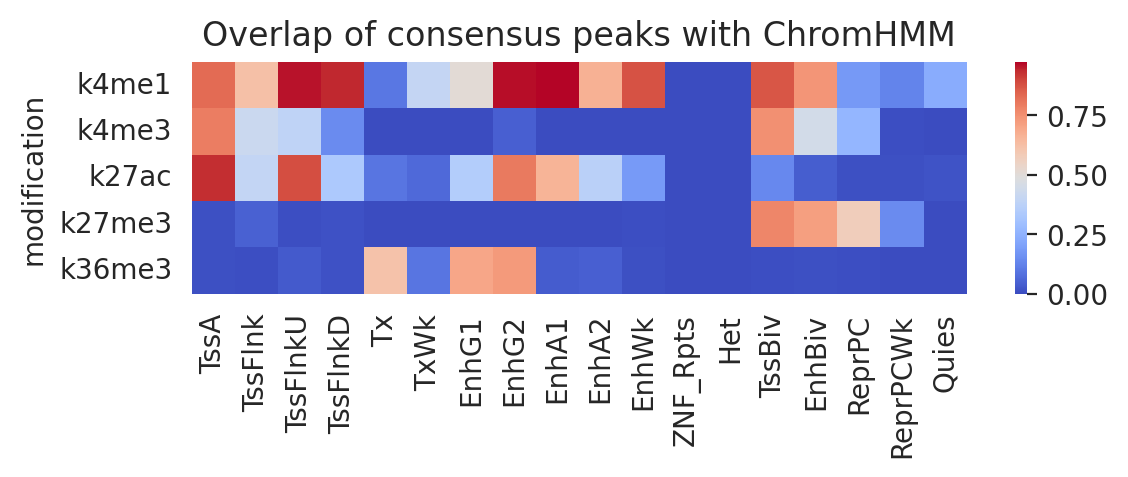

In [52]:
plt.figure(figsize=(6, 2.5))
ax = plt.axes()
sns.heatmap(chromhmm_rel_df, cmap='coolwarm', ax=ax)
plt.title('Overlap of consensus peaks with ChromHMM')
ax.xaxis.set_tick_params(rotation=90)
plt.tight_layout()
plt.show()